In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
titanic = sns.load_dataset('titanic')

# Calculate the number of missing values
print("\nMissing Values per Column Before Filling:")
print(titanic.isnull().sum())


Missing Values per Column Before Filling:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [35]:
# Calculate the mean of the 'Age' column using Numpy
mean_age = np.nanmean(titanic['age'].values)
print("Mean Age Calculated by Numpy:", mean_age)

# Fill missing values in 'Age' with the mean age calculated by Numpy
titanic['age'] = np.where(np.isnan(titanic['age']), mean_age, titanic['age'])

Mean Age Calculated by Numpy: 29.69911764705882


In [36]:
# Check again for missing values
print("\nMissing Values in 'Age' After Filling:")
print(titanic['age'].isnull().sum())


Missing Values in 'Age' After Filling:
0


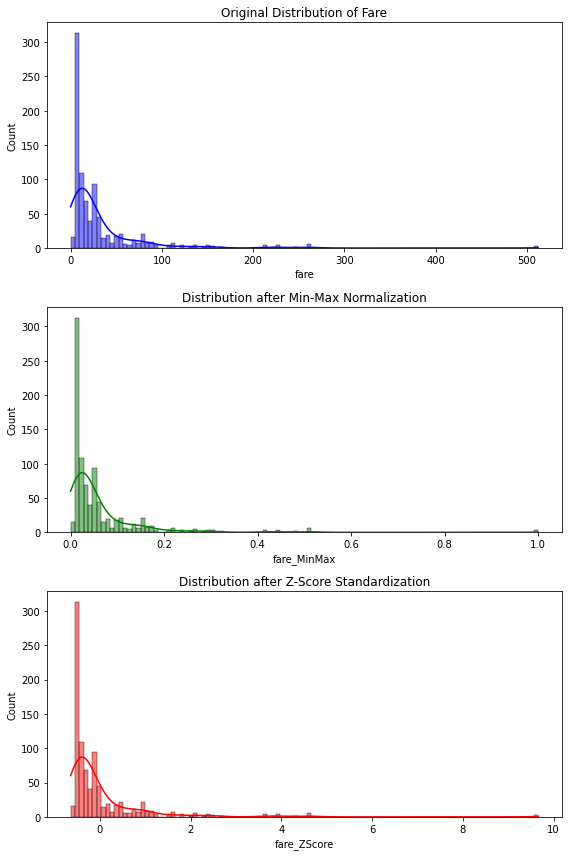

In [37]:
import matplotlib.pyplot as plt

# Function to apply Min-Max Normalization
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Function to apply Z-score Standardization
def z_score_normalize(column):
    return (column - column.mean()) / column.std()

# Apply normalization techniques
titanic['fare_MinMax'] = min_max_normalize(titanic['fare'])
titanic['fare_ZScore'] = z_score_normalize(titanic['fare'])

# Plotting the distributions
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
sns.histplot(titanic['fare'], ax=axes[0], kde=True, color="blue")
axes[0].set_title('Original Distribution of Fare')

sns.histplot(titanic['fare_MinMax'], ax=axes[1], kde=True, color="green")
axes[1].set_title('Distribution after Min-Max Normalization')

sns.histplot(titanic['fare_ZScore'], ax=axes[2], kde=True, color="red")
axes[2].set_title('Distribution after Z-Score Standardization')

plt.tight_layout()
plt.show()

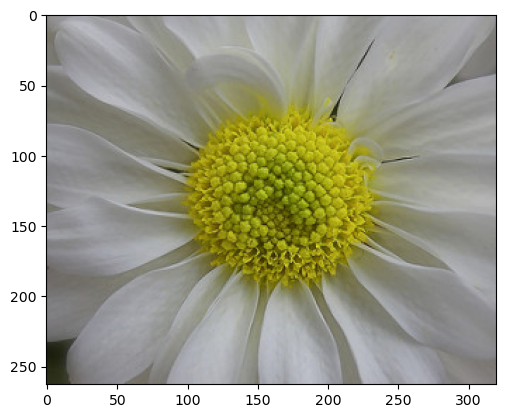

In [1]:
import numpy as np
from matplotlib import image, pyplot

img = image.imread('daisy.jpg') 
pyplot.imshow(img)
pyplot.show()

In [39]:
print(img.shape)
print(type(img))

(263, 320, 3)
<class 'numpy.ndarray'>


In [40]:
# Slice to get the region from 0 to 10 in x and y, for all color channels
region = img[0:11, 0:11, ]

for i in range(2,3):
    for row in region[:,:,i]:
        print(" ".join(f"{value:3}" for value in row))

133 136 142 145 146 147 151 153 153 149 147
132 135 139 144 146 147 148 152 148 149 148
131 134 139 144 146 146 148 149 150 151 151
130 134 138 141 145 146 147 148 151 151 151
128 133 137 140 142 145 146 147 149 149 152
126 129 133 138 139 141 143 146 146 151 157
125 127 131 135 136 138 141 143 145 152 161
124 126 129 131 134 136 139 141 144 152 160
120 125 126 137 135 133 143 141 140 144 150
120 123 122 130 133 133 142 139 143 144 148
118 120 117 124 129 132 138 137 134 137 143


In [7]:
img_array = np.array(img)
rotated_img = np.zeros((img_array.shape[0],img_array.shape[1]))
k = []
for i in range(rotated_img.shape[0]):
    for j in range(rotated_img.shape[1]):
        rotated_img[j, rotated_img.shape[0] - 1 - i] = img_array[i][i, j]
        k.append(rotated_img)
pyplot.imshow(k)

IndexError: index 3 is out of bounds for axis 1 with size 3

In [10]:
img_array = np.array(img)
rotated_img = np.zeros((img_array.shape[0],img_array.shape[1]))
rotated_img
img_array

array([[[135, 135, 133],
        [138, 138, 136],
        [142, 142, 142],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[134, 134, 132],
        [137, 137, 135],
        [141, 141, 139],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[133, 133, 131],
        [136, 136, 134],
        [141, 141, 139],
        ...,
        [153, 153, 153],
        [155, 155, 155],
        [146, 146, 146]],

       ...,

       [[ 45,  48,  27],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [130, 126, 125],
        [130, 126, 125],
        [129, 125, 124]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [130, 126, 125],
        [130, 126, 125],
        [130, 126, 125]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [132, 128, 127],
        [132, 128, 127],
        [132, 128, 127]]

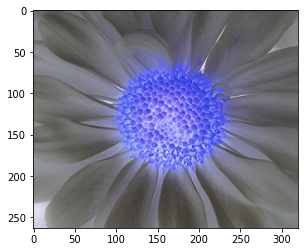

In [42]:
def reverse(img_data):
    #r_img = 255 - img_data
    r_img = np.zeros(img_data.shape,'uint16')
    r_img[:,:,0] = 255-img_data[:,:,0]
    r_img[:,:,1] = 255-img_data[:,:,1]
    r_img[:,:,2] = 255-img_data[:,:,2]
    pyplot.imshow(r_img)
    pyplot.show()
    
reverse(img)

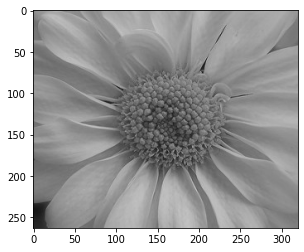

In [43]:
def grey(img_data):
    g_img = np.zeros(img_data.shape,'uint8')
    avg_img = img_data[:,:,0].astype(np.uint16)+img_data[:,:,1].astype(np.uint16)+img_data[:,:,2].astype(np.uint16)
    avg_img //= 3
    g_img[:,:,0] = avg_img
    g_img[:,:,1] = avg_img
    g_img[:,:,2] = avg_img
    pyplot.imshow(g_img)
    pyplot.show()
grey(img)

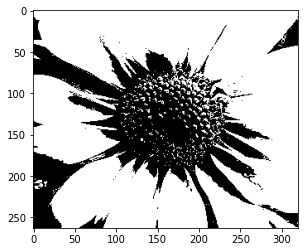

In [44]:
def bw(img_data):
    bw = np.zeros(img_data.shape,'uint8')
    avg_img = img_data[:,:,0].astype(np.uint16)+img_data[:,:,1].astype(np.uint16)+img_data[:,:,2].astype(np.uint16)
    avg_img //= 3
    bw[:,:,0] = np.where(avg_img < 128, 0, 255)
    bw[:,:,1] = np.where(avg_img < 128, 0, 255)
    bw[:,:,2] = np.where(avg_img < 128, 0, 255)
    pyplot.imshow(bw)
    pyplot.show()
bw(img)

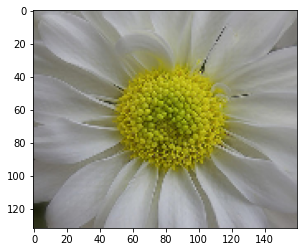

In [47]:
def resize_(img_data):
    resized_img = img_data[::2, ::2]    
    pyplot.imshow(resized_img)
    pyplot.show()
resize_(img)


In [12]:
import numpy as np
from matplotlib import image, pyplot

img = image.imread('daisy.jpg')
matrix = np.array(img)
print(matrix.shape)



# # 90도 시계 방향 회전을 수동으로 구현
rotated_matrix = np.zeros((matrix.shape[1], matrix.shape[0], matrix.shape[2]), dtype=matrix.dtype)

print(matrix.shape[0], matrix.shape[1], matrix.shape[2], matrix.dtype)


#print(rotated_matrix)

for i in range(matrix.shape[0]):
    #print(i)
    for j in range(matrix.shape[1]):
        rotated_matrix[j, matrix.shape[0] - 1 - i] = matrix[i, j]

print(rotated_matrix)

(263, 320, 3)
263 320 3 uint8
[[[ 44  47  26]
  [ 44  47  26]
  [ 45  48  27]
  ...
  [133 133 131]
  [134 134 132]
  [135 135 133]]

 [[ 44  47  26]
  [ 44  47  26]
  [ 44  47  26]
  ...
  [136 136 134]
  [137 137 135]
  [138 138 136]]

 [[ 44  47  26]
  [ 44  47  26]
  [ 44  47  26]
  ...
  [141 141 139]
  [141 141 139]
  [142 142 142]]

 ...

 [[132 128 127]
  [130 126 125]
  [130 126 125]
  ...
  [153 153 153]
  [153 153 153]
  [153 153 153]]

 [[132 128 127]
  [130 126 125]
  [130 126 125]
  ...
  [155 155 155]
  [156 156 156]
  [156 156 156]]

 [[132 128 127]
  [130 126 125]
  [129 125 124]
  ...
  [146 146 146]
  [148 148 148]
  [148 148 148]]]


In [13]:
from PIL import Image
import numpy as np

# 배열을 PIL 이미지로 변환
img = Image.fromarray(rotated_matrix)

# 결과 확인 (이미지 보여주기)
img.show()

In [14]:
# Flip the matrix vertically
flipped_matrix = np.flip(rotated_matrix, axis=1)
img = Image.fromarray(flipped_matrix)

# 결과 확인 (이미지 보여주기)
img.show()

In [15]:
import numpy as np

def center_crop(flipped_matrix, crop_size=100):
    h, w = flipped_matrix.shape[:2]  # 이미지 높이, 너비 가져오기

    top = (h - crop_size) // 2       # 위쪽 시작점
    left = (w - crop_size) // 2      # 왼쪽 시작점

    cropped = flipped_matrix[top:top+crop_size, left:left+crop_size]

    return cropped

In [16]:
cropped_array = center_crop(flipped_matrix)
img = Image.fromarray(cropped_array)
img.show()